<a href="https://colab.research.google.com/github/nikhil-xyz/Data-Cleaning-Notebook/blob/main/GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Github Indian users deep data**

This dataset provides a rich snapshot of GitHub users from India, capturing various aspects of their public profiles. It's a valuable resource for analyzing trends in coding activity, repository management, and user engagement within the Indian developer community. Whether you're interested in exploring how developers grow their followers, examining language preferences, or identifying patterns in contributions and achievements, this dataset offers multiple points of analysis.

source(kaggle) : https://www.kaggle.com/datasets/architty108/github-indian-users-deep-data

###**Key Features :**

- **Username** : GitHub usernames of the individuals.
- **Gender Pronoun** : Preferred gender pronouns (if available).
- **Followings** : Number of people each user follows.
- **Joining Year** : The year they joined GitHub.
- **Contributions** : Number of contributions made in the last year.
- **Achievements** : Number of GitHub achievements unlocked by the user.
- **Stars** : Total number of stars on their repositories.
- **Repositories** : Number of repositories created.
- **Followers** : Number of followers each user has.
- **Location** : User location details, primarily from India.
- **Languages** : Primary programming language used by the individual.
- **Social Links** : Links to their other social platforms (LinkedIn, personal websites, etc.).
- **Sorting Type** : Categorized based on followers, repositories, or recent joining.

Dataset has been downloaded from the kaggle and stored in one of the github repository.

repository_raw_dataset_url = 'https://github.com/nikhil-xyz/datasets/raw/main/GitHub.zip'

In [109]:
import requests
import zipfile
from io import BytesIO

# Updated URL to direct download link
url = 'https://github.com/nikhil-xyz/datasets/raw/main/GitHub.zip'

archieve = requests.get(url)

# Check if the request was successful
if archieve.status_code == 200:
    with zipfile.ZipFile(BytesIO(archieve.content), 'r') as zip_content:
        zip_content.extractall()
else:
    print(f"Failed to download the file. Status code: {archieve.status_code}")

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('/content/Github Indian users deep data.csv')

In [112]:
df.head()

,Unnamed: 0,username,gender_pronoun,followings,joining_year,last_year_contributions,achievements_num,stars,has_readme,social_link,social_platform,works_for,status,name,location,repositories,followers,language,sorting type,description
0,0,SumithSPrince,he/him,1,2021.0,2.0,0,0,False,NaN,NaN,NaN,NaN,Sumith S,"Bangalore, India",1,0,Java,Most recently joined,Hello 👋\n\nGreat you visited my profile!\n\nI'...
1,1,infysumanta,NaN,38,2018.0,623.0,5,87,True,https://sumantakabiraj.com,X@infysumanta,NaN,Focusing,Sumanta Kabiraj,"Kolkata, India",445,9,Java,Most repositories,Sculpting the digital frontier with a mastery ...
2,2,codingwithkrish,NaN,8,2021.0,204.0,6,9,True,http://krishgupta.com,NaN,Synkrama,NaN,Krish Gupta,India,37,6,Java,Most followers,I am a B.Tech Professional students from Vishw...
3,3,anirbanbose401,he/him,3,2023.0,2.0,0,0,False,https://www.soa.ac.in/iter,LinkedInin/anirban-bose-4a238b245,Institute of Technical Education and Research,NaN,ANIRBAN BOSE,India,3,0,Java,Most recently joined,I've always been interested in programming. So...
4,4,neilrehani101,he/him,3,2021.0,6.0,0,0,False,NaN,NaN,NaN,NaN,Neil Rehani,India,29,0,Python,Fewest followers,I am a keen learner and want to explore nearly...


In [113]:
df.shape

(10164, 20)

In [114]:
df.columns

Index(['Unnamed: 0', 'username', 'gender_pronoun', 'followings',
       'joining_year', 'last_year_contributions', 'achievements_num', 'stars',
       'has_readme', 'social_link', 'social_platform', 'works_for', 'status',
       'name', 'location', 'repositories', 'followers', 'language',
       'sorting type', 'description'],
      dtype='object')

In [115]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [116]:
df.columns

Index(['username', 'gender_pronoun', 'followings', 'joining_year',
       'last_year_contributions', 'achievements_num', 'stars', 'has_readme',
       'social_link', 'social_platform', 'works_for', 'status', 'name',
       'location', 'repositories', 'followers', 'language', 'sorting type',
       'description'],
      dtype='object')

### Handling the **following, followers, and the repositories** feature

In [117]:
df[['followings', 'followers', 'repositories']].head()

,followings,followers,repositories
0,1,0,1
1,38,9,445
2,8,6,37
3,3,0,3
4,3,0,29


In [118]:
print(df.followings.isna().sum())
print(df.followers.isna().sum())
print(df.repositories.isna().sum())

2988
0
0


In [119]:
print(df[df.followings == '0'].shape)
print(df[df.followers == '0'].shape)
print(df[df.repositories == '0'].shape)

(828, 19)
(4353, 19)
(143, 19)


In [120]:
df.followings.unique()

array(['1', '38', '8', '3', '2', '14', '4', '9', '0', '11', '6', '5', '7',
       '12', '20', '16', '26', '10', '18', '39', '27', '36', '15', '24',
       '17', '50', '23', '28', '121', '60', '52', '197', '13', '42', '37',
       '74', '33', '31', '61', '34', '22', '129', '62', '178', '102',
       '67', '19', '21', '56', '75', '30', '41', '86', '25', '47', '40',
       '44', '53', '32', '63', '90', '35', '46', '29', '229', '45', '51',
       '249', '69', '139', '55', '65', '247', '49', '315', '110', '434',
       '66', '92', '341', '199', '70', '96', '242', '124', '48', '244',
       '155', '217', '1.3k', '192', '215', '80', '228', '43', '345', '72',
       '64', '115', '285', '94', '68', '203', '120', '196', '248', '238',
       '131', '114', '89', '1.1k', '140', '239', '166', '71', '126', '97',
       '105', '57', '160', '289', '154', '76', '195', '128', '157', '410',
       '88', '279', '165', '141', '119', '84', '98', '206', '171', '354',
       '531', '59', '218', '107', nan, '77

**Observations**
- Entries associated with the **followings, followers and the repositories** feature are not strictly in integer or float format, contains entries like **2.5k**, modifications required.
- Also, the **followings** feature contain some missing entries.

**Operations**
- We have methods like allocating either mean, median, or mode of non-missing values to missing values, or we can replace all the missing entries with 0. I am going with second approach.
- The **followings** feature is of string datatype and it needs to be converted into an integer first.
- The transformation will be carried out in the following manner

    '23.0'  ->  23

    '114'   ->  114
    
    '1.5k'  ->  1500

In [121]:
df.followings.fillna(0, inplace=True)
df.followings.isna().sum()

<ipython-input-121-e583c3fc9d81>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.followings.fillna(0, inplace=True)


0

In [122]:
def k_to_thousand(string):
  """
  The function is responsible for transforming string to integer
  The results will look like the following samples post transformation
  1.5k  -> 1500
  100   -> 100
  100.0 -> 100

  Args
  string : contains the string on which transformation will be applied
  """
  string = str(string)
  k_flag = False
  if 'k' in string:
    string = string.replace('k', '')
    k_flag = True

  string = float(string)
  if k_flag:
    string *= 1000
  return int(string)

# Applying above function on both the followings, followers and the repositories feature
df.followings = df.followings.apply(k_to_thousand)
df.followers = df.followers.apply(k_to_thousand)
df.repositories = df.repositories.apply(k_to_thousand)

In [123]:
df.followings.unique()

array([   1,   38,    8,    3,    2,   14,    4,    9,    0,   11,    6,
          5,    7,   12,   20,   16,   26,   10,   18,   39,   27,   36,
         15,   24,   17,   50,   23,   28,  121,   60,   52,  197,   13,
         42,   37,   74,   33,   31,   61,   34,   22,  129,   62,  178,
        102,   67,   19,   21,   56,   75,   30,   41,   86,   25,   47,
         40,   44,   53,   32,   63,   90,   35,   46,   29,  229,   45,
         51,  249,   69,  139,   55,   65,  247,   49,  315,  110,  434,
         66,   92,  341,  199,   70,   96,  242,  124,   48,  244,  155,
        217, 1300,  192,  215,   80,  228,   43,  345,   72,   64,  115,
        285,   94,   68,  203,  120,  196,  248,  238,  131,  114,   89,
       1100,  140,  239,  166,   71,  126,   97,  105,   57,  160,  289,
        154,   76,  195,  128,  157,  410,   88,  279,  165,  141,  119,
         84,   98,  206,  171,  354,  531,   59,  218,  107,   77,   82,
         73,   54,  135,   87,  101,   78,   79,  1

In [124]:
df.followers.unique()

array([   0,    9,    6,    2,   15,    3,    4,   11,    1,    8,   12,
         35,   25,   16,   24,   81,   32,   18,    7,    5,   10,   14,
         39,   30,   70,   71,   26,   37,   29,  134,   65,   95,   33,
         20,   27,   41,   34,  403,   59,   43,   38,   17,   13,   61,
         44,   42,   28,   36,  153,   48,   60,   22,   85,   21,   72,
         23,  106,   19,  127,   83,   45,  173,  315,  121,   47,  240,
         63,   54,   58,   55,  130,  128,   82,   67,   74,  204,   49,
         77,  328,   64,   52,  306,   51,   86,   69,  142,   93,   94,
        108,   56,  345,   31,   73,   62,  851,  768,  233,  647,  135,
        105,   68, 1800,  166,  103,  324,  234, 2100,  221,  104, 1000,
        110,  160,  350,   57,   80,   76,  155,   40,  223,  120,  109,
        331,   53,   91,  143,  148,   96, 1600,   90,  281,   50,   97,
        123,  180,   46,   78,  158,   98,  337,  145,  228,  112, 1200,
        140,  266,  102,  132,  183,  188, 8800,   

<Axes: ylabel='Frequency'>

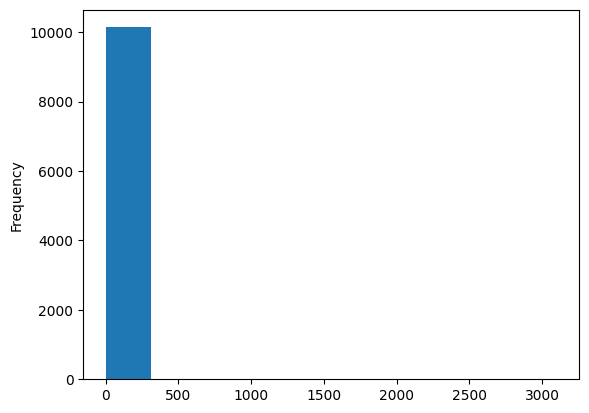

In [125]:
df.repositories.plot(kind='hist')

**Observations**
- There are certain accounts where number of repositories is comparitavely very large number which can lead to increase in variance during calculations.
- The current distribution is right skewed, the ideal distribution should look like more Gaussian-like.

In [126]:
df.drop(df[df.repositories > 500].index, inplace=True)

<Axes: ylabel='Frequency'>

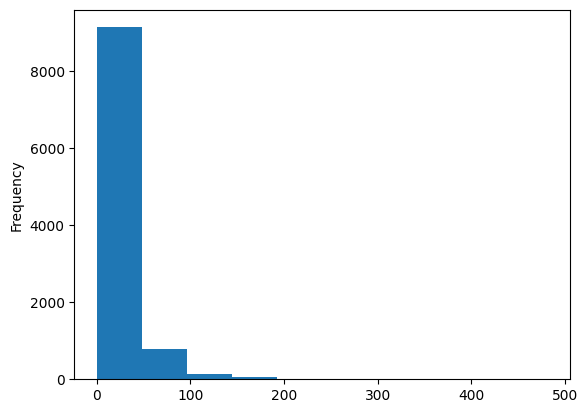

In [127]:
df.repositories.plot(kind='hist')

## Handling the **username** feature

In [128]:
df.username.unique().__len__()

10156

**Observations**
- All the usernames are unique and no analysis can be drawn from them.
- This feature should be exlcluded from the model training.

## Handling the **gender_pronoun** feature

In [129]:
df.gender_pronoun.unique()

array(['he/him', nan, 'Gentleman/Wiseman', 'she/her', 'they/them',
       'PhD (Mathematics)', 'Techie', 'The one', '?V', 'Shivam',
       'bit/bits', 'Little Codr', 'ShaksZ', 'phenol', 'He/Him', 'Him',
       'Just a Tech', 'Go/TypeScript/Powershell', 'He/Him/His',
       'You can do it ?', 'Nayeem', 'SSL/SSO', 'Σ', 'Mr.', 'coder',
       'bro/bhai', 'Batman/Bateman', 'if/else', 'he', 'Thar/kuri',
       'bat/man', 'Mritunjay Kumar', 'roro', 'insaan', 'she/her/they',
       'Pengwin/Penglose', 'MR', 'Arch BTW', 'Mr', 'Nanya',
       'White Power Ranger', 'Attack Helicopter', 'Rocket/Raccoon',
       'CodeholiC', 'Developer', 'He/Him • Programmer + Gamer',
       'King/God', '~Hack3r_Oneness is Active on Internet'], dtype=object)

In [130]:
df.gender_pronoun.isna().sum()

7014

In [131]:
df.gender_pronoun.value_counts()

,count
gender_pronoun,
he/him,2742
she/her,343
they/them,11
He/Him/His,2
Mr,2
He/Him • Programmer + Gamer,1
Developer,1
he,1
Thar/kuri,1


**Obervations**
- We have multiple gender pronoun categories present inside the feature
- Transforming them all into male and female will make model training easy.
- Also, we have more than 50% of values unspecified. Missing values needs to be handles first.

**Operations**
- All the gender pronoun categories can be transformed into either of the **male** or **female** categories.
- User's name can be used to extract gender for all the missing entries. Python api **guess-indian-gender 1.0.1** can help finding gender based on the name given.
- API Link : https://pypi.org/project/guess-indian-gender/
- Since the accuracy of the api is good enough, procedure can be applied to all the users (both with or without gender pronoun)
- Also, we have only one user whose name is missing, so that user can be removed before applying operations.

In [132]:
df.name.isna().sum()

1

In [133]:
# Deleting users with missing name value
df.drop(df[df.name.isna()].index, inplace=True)

In [134]:
df.name.isna().sum()

0

In [135]:
pip install guess-indian-gender

In [136]:
from guess_indian_gender import IndianGenderPredictor
i = IndianGenderPredictor()
i.predict(name="Santosh") # returns male

'female'

In [137]:
from guess_indian_gender import IndianGenderPredictor
i = IndianGenderPredictor()

def gender_detector(full_name):
  """
  The function is responsible for finding gender of user based on the name given
  Args
  name : contains the name of the user for which gender needs to be found
  """

  # Retrieving first name
  try:
    name = full_name.split()[0]
  except Exception as e:
    print(full_name)
  gender = i.predict(name=name)
  if gender == 'mostly_male':
    return 'male'
  elif gender == 'mostly_female':
    return 'female'
  else:
    return gender

df['gender_pronoun'] = df['name'].apply(gender_detector)

In [138]:
df.gender_pronoun.isna().sum()

0

In [139]:
df.gender_pronoun.value_counts()

,count
gender_pronoun,
male,9165
female,990


In [140]:
df[df.gender_pronoun == 'female']['name'].head(60)

,name
1,Sumanta Kabiraj
10,Glimmy
20,Bhawana Gupta
31,Dibyajyoti Pradhan
52,Anshuman Negi
54,Priya Patil
60,Trisha Moitra
63,Ayushree Mishra
64,Tavish Bhardwaj
65,Praveen Kumar


- Looks like still there are some entries where 'female' gender is wrongly assigned
- Now, we will try to assign gender manually

In [141]:
def gender_assign_manual(full_name):
  """
  The function is responsible for assigning the gender to the person manually
  Args
  name : contains the name of the user for which gender needs to be found
  """

  # Retrieving first name
  name = full_name.split()[0]

  names = ['Akshar', 'Santosh', 'Ashutosh', 'Shantanu', 'Naveen', 'Debopam', 'Vishwas', 'Kanhaiya', 'Junaid', 'Anshuman', 'Praveen', 'Brahat', 'Kunwar', 'Akhilesh']

  if name in names:
    return 'male'
  else:
    return 'female'

# Applying only for entries where gender_pronoun is 'female'
df['gender_pronoun'] = df.apply(lambda x: gender_assign_manual(x['name']) if x['gender_pronoun'] == 'female' else x['gender_pronoun'], axis=1)

In [142]:
df.gender_pronoun.value_counts()

,count
gender_pronoun,
male,9231
female,924


In [143]:
df[df.gender_pronoun == 'female']['name'].head(60)

,name
1,Sumanta Kabiraj
10,Glimmy
20,Bhawana Gupta
31,Dibyajyoti Pradhan
54,Priya Patil
60,Trisha Moitra
63,Ayushree Mishra
64,Tavish Bhardwaj
77,Preety Rai
82,Nayna Sahu


In [144]:
df.gender_pronoun.value_counts()

,count
gender_pronoun,
male,9231
female,924


In [145]:
df.columns

Index(['username', 'gender_pronoun', 'followings', 'joining_year',
       'last_year_contributions', 'achievements_num', 'stars', 'has_readme',
       'social_link', 'social_platform', 'works_for', 'status', 'name',
       'location', 'repositories', 'followers', 'language', 'sorting type',
       'description'],
      dtype='object')

## Handling the **joining_year** feature

In [146]:
df.joining_year.unique()

array([2021., 2018., 2023., 2024., 2019., 2020., 2014., 2015., 2016.,
       2022., 2012., 2017., 2013., 2011., 2010., 2008., 2009., 1999.,
       1990.,   nan, 1976., 1969., 2005.])

In [147]:
df.joining_year.info()

<class 'pandas.core.series.Series'>
Index: 10155 entries, 0 to 10163
Series name: joining_year
Non-Null Count  Dtype  
--------------  -----  
10061 non-null  float64
dtypes: float64(1)
memory usage: 158.7 KB


In [148]:
df.joining_year.min()

1969.0

In [149]:
df.joining_year.isna().sum()

94

**Observations**
- GitHub was founded in the year 2008, but current dataset contain entries earlier to it. Such entries should be treated as an outliers.
- Also, there is no other feature available in the dataset from where **joining_year** can be extracted.


**Operations**
- One approach to allocate value for missing entries and outliers in  **joining_year** is by assigning values based on number of repositories created by the user.
- It is likely that longer the user is using GitHub, more work he/she will do with more repositories.
- Custom criteria can be used to allocate the **joining_year** is to assume on average user creates **10** repositories. So, the formula will be *joining_year = current_year(2024) - (repositories / 10)*
- It also needs to make sure that joining_year shouldn't go below 2008 during the update. So, the updated formula should look like *joining_year = max(2008, current_year(2024) - (repositories / 10))*

In [150]:
# Finding out indexes of entries where joining_year is before 2008 or data is missing
joining_year_indexes = df[(df.joining_year < 2008) | (df.joining_year.isna())].index

In [151]:
# Changing the datatype
df['repositories'] = df['repositories'].astype(int)

In [152]:
df.loc[joining_year_indexes, 'joining_year'] = df.loc[joining_year_indexes, 'repositories'].apply(lambda x: max(2008, int(2024 - (int(x) / 10))))

In [153]:
df.joining_year.unique()

array([2021., 2018., 2023., 2024., 2019., 2020., 2014., 2015., 2016.,
       2022., 2012., 2017., 2013., 2011., 2010., 2008., 2009.])

## Handling the **last_year_contributions** feature

In [154]:
df.last_year_contributions.head()

,last_year_contributions
0,2.0
1,623.0
2,204.0
3,2.0
4,6.0


In [155]:
df.last_year_contributions.isna().sum()

94

<Axes: xlabel='joining_year'>

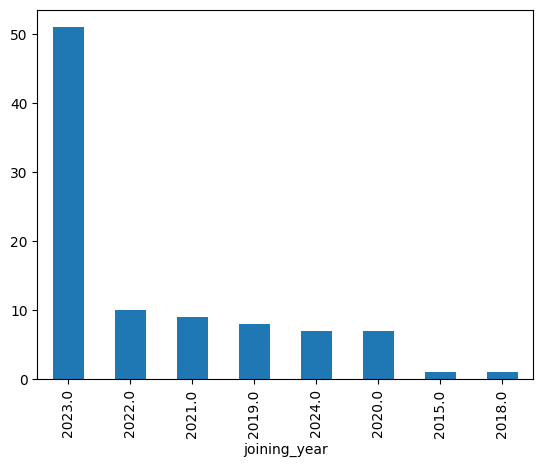

In [156]:
df[df.last_year_contributions.isna()]['joining_year'].value_counts().plot(kind='bar')

In [157]:
df1 = df[~df.last_year_contributions.isna()].groupby('joining_year')['last_year_contributions'].mean().reset_index()

In [158]:
df2 = df.joining_year.value_counts().sort_index(ascending=False)
df2.name = 'count'
df2 = df2.reset_index()
df2.columns = ['joining_year', 'contrinutors']

<Axes: xlabel='joining_year'>

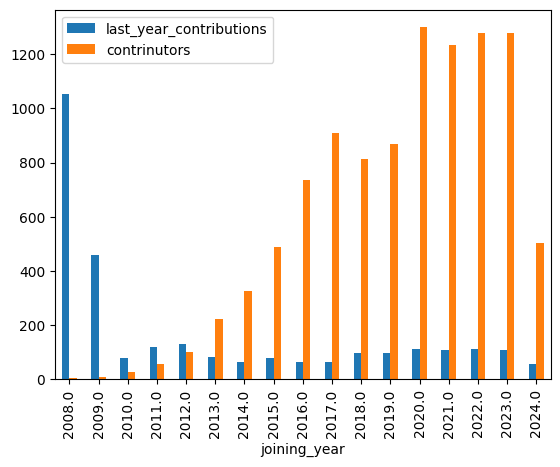

In [159]:
df1.merge(df2, on = 'joining_year').plot(x='joining_year', y=['last_year_contributions', 'contrinutors'], kind='bar')

**Observations**
- Proportion of last 10 years contributors and contributions is maintained.

**Operations**
- Missing entries can be replaced with an average integer value of contributions from the respected year.

In [160]:
# identifying indexes of all the missing entries
missing_contribution_index = df[df.last_year_contributions.isna()].index

In [161]:
# Replacing missing values of last_year_contributions
df.loc[missing_contribution_index, 'last_year_contributions'] = df.loc[missing_contribution_index].apply(lambda x: int(df1[df1.joining_year == x['joining_year']]['last_year_contributions']), axis=1)

<ipython-input-161-7924600c527e>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df.loc[missing_contribution_index, 'last_year_contributions'] = df.loc[missing_contribution_index].apply(lambda x: int(df1[df1.joining_year == x['joining_year']]['last_year_contributions']), axis=1)


In [162]:
df.last_year_contributions.isna().sum()

0

In [163]:
df[df.last_year_contributions > 3000].shape

(14, 19)

<Axes: ylabel='Frequency'>

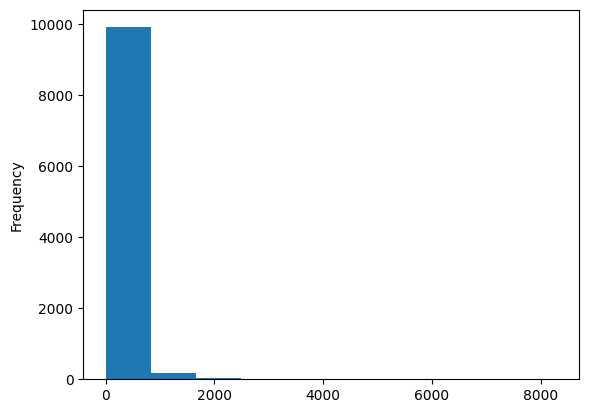

In [164]:
df.last_year_contributions.plot(kind='hist')

**Observations**
- Distribution of contributuion of users is right-skewed.
- Even if having contributions more than 3000 per year could be genuine, such rare cases might not be good fit for model training.
- Such unique samples perform the role of outliers. Hence, they should be considered outliers.

In [165]:
contributions_outlier_index = df[df.last_year_contributions > 1000].index
df.drop(contributions_outlier_index, inplace=True)

<Axes: ylabel='Frequency'>

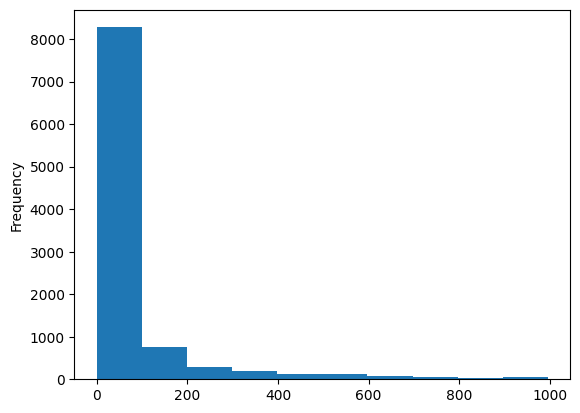

In [166]:
df.last_year_contributions.plot(kind='hist')

<Axes: ylabel='Frequency'>

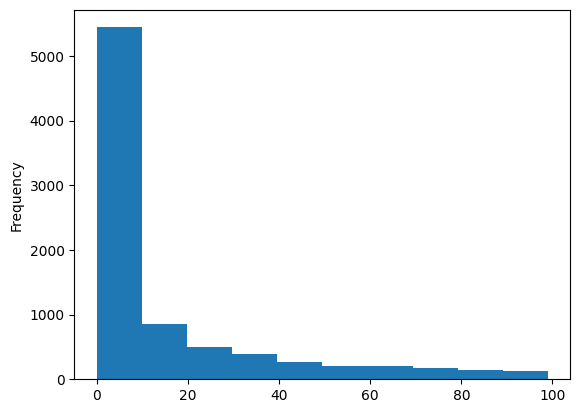

In [167]:
df[df.last_year_contributions < 100]['last_year_contributions'].plot(kind='hist')

## Handling the **star** feature

A GitHub repository star is a way for users to bookmark or show appreciation for a repository. Think of it like a "like" on Facebook or a bookmark in your web browser, but specifically for GitHub repositories.

In [168]:
df.stars.unique()

array(['0', '87', '9', '5', '12', '1', '4', '8', '6', '20', '91', '7',
       '17', '22', '33', '46', '115', '3', '51', '100', '19', '44', '2',
       '14', '10', '48', '43', '47', '57', '15', '16', '24', '13', '52',
       '145', '154', '118', '116', '88', '41', '281', '37', '95', '89',
       '11', '205', '18', '343', '204', '21', '227', '45', '38', '28',
       '25', '358', '36', '34', '59', '54', '108', '30', '26', '112',
       '561', '23', '141', '63', '135', '92', '29', '166', '73', '122',
       '120', '39', '224', '31', '49', '32', '50', '486', '111', '96',
       '61', '212', '164', '316', '66', '119', '27', '35', '64', '153',
       '71', '65', '103', '2.6k', '80', '232', '1k', '344', '342', '207',
       '93', '78', '257', '81', '68', '152', '215', '40', '128', '56',
       '531', '107', '216', '314', '129', '270', '110', '234', '138',
       '114', '621', '76', '60', '82', '2.9k', '58', '267', '98', '84',
       '348', '77', '201', '263', '55', '178', '104', '72', '62', '1

In [169]:
df.stars.isna().sum()

87

**Observations**
- Looks like **stars** feature also needs preprocessing for unit conversion (1.5k ---> 1500)
- The function which was used earlier (**k_to_thousand**) can be used again.
- But first, missing values should be handled or ensure operations are carried out only on non-missing entries.

In [170]:
# identifying indexes of all the non-missing entries from the stars feature
stars_missing_index = df[~df.stars.isna()].index

# applying transformations
df.loc[stars_missing_index, 'stars'] = df.loc[stars_missing_index, 'stars'].apply(k_to_thousand)

In [171]:
df.stars.unique()

array([0, 87, 9, 5, 12, 1, 4, 8, 6, 20, 91, 7, 17, 22, 33, 46, 115, 3, 51,
       100, 19, 44, 2, 14, 10, 48, 43, 47, 57, 15, 16, 24, 13, 52, 145,
       154, 118, 116, 88, 41, 281, 37, 95, 89, 11, 205, 18, 343, 204, 21,
       227, 45, 38, 28, 25, 358, 36, 34, 59, 54, 108, 30, 26, 112, 561,
       23, 141, 63, 135, 92, 29, 166, 73, 122, 120, 39, 224, 31, 49, 32,
       50, 486, 111, 96, 61, 212, 164, 316, 66, 119, 27, 35, 64, 153, 71,
       65, 103, 2600, 80, 232, 1000, 344, 342, 207, 93, 78, 257, 81, 68,
       152, 215, 40, 128, 56, 531, 107, 216, 314, 129, 270, 110, 234, 138,
       114, 621, 76, 60, 82, 2900, 58, 267, 98, 84, 348, 77, 201, 263, 55,
       178, 104, 72, 62, 177, 394, 684, 42, 379, 79, 121, 640, 374, 338,
       297, 143, 113, 90, 151, 101, 237, 190, 710, 273, 558, 75, 460, 769,
       174, 125, 341, 340, 194, 185, 146, 193, 53, 329, 326, 1100, 302,
       99, 253, 130, 134, 417, 284, 429, 3400, 385, 208, 453, 69, 70, 304,
       280, 345, 147, 861, 268, 67, 165, 6

<Axes: ylabel='Frequency'>

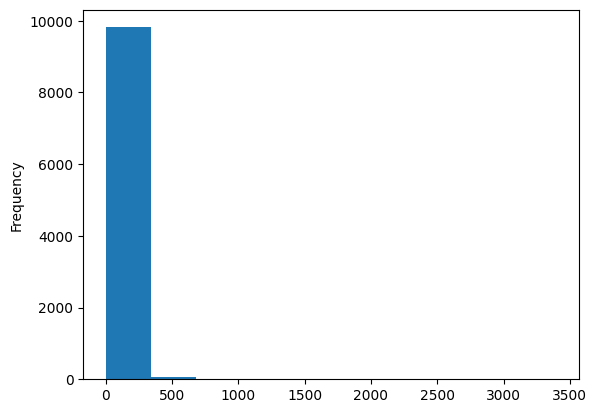

In [172]:
df.stars.plot(kind='hist')

**Observations**
- Although, it is absolutely possible that projects made by genius minds attract massive stars, but they also play crucial role in increasing the variance during calculations.
- From above graph, it appears that profiles with stars more than 1000 might act as an outliers.

In [173]:
df[df.stars > 1000].index

Index([ 800, 1520, 2467, 2582, 3470, 3603, 4083, 4463, 5873, 6997, 9287, 9318,
       9481, 9591],
      dtype='int64')

In [174]:
# deleting outliers
df.drop(df[df.stars > 500].index, inplace=True)

<Axes: ylabel='Frequency'>

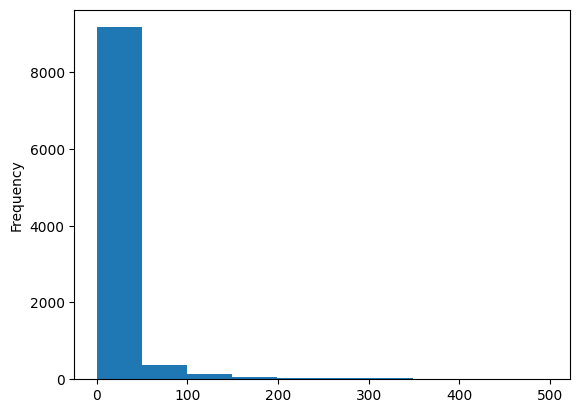

In [175]:
df.stars.plot(kind='hist')

**Operations**
- Once outliers are removed, missing entries can be handles by replacing them with the mean.

In [176]:
# Handling the missing values by replacing them with the mean of non-missing entries
df.stars.fillna(df.stars.mean(), inplace=True)

<ipython-input-176-d38a73aafa2b>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.stars.fillna(df.stars.mean(), inplace=True)


In [177]:
df.stars.isna().sum()

0

In [178]:
df.isna().sum()

,0
username,0
gender_pronoun,0
followings,0
joining_year,0
last_year_contributions,0
achievements_num,0
stars,0
has_readme,0
social_link,6228
social_platform,5590


<Axes: ylabel='count'>

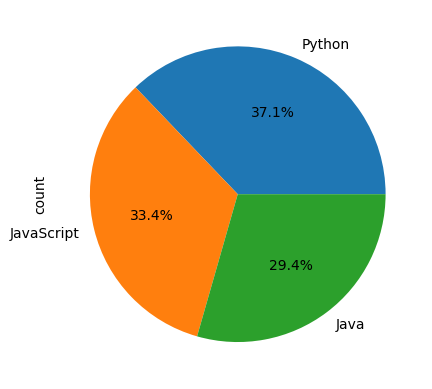

In [179]:
df.language.value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: >

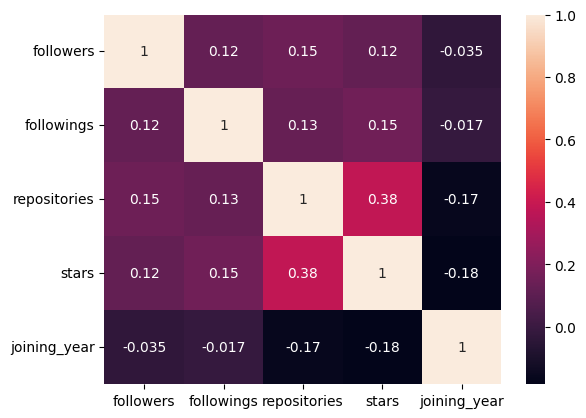

In [180]:
sns.heatmap(df[['followers', 'followings', 'repositories', 'stars', 'joining_year']].corr(), annot=True)